# Housing Analysis Project
* Student name: Bella Scribner
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


# The Business + Project 

- A non-for-profit addiction treatment center is looking to expand their services to offer half-way houses or sober living homes to those who complete the rehabilitation in-patient treatment. 
- maybe look up some short paraphrased argumentation on the importance of halfway houses/sober living homes before returning to full independence is so important to those dealing with addiction and in recovery. 

- The center is inquiring about predictions on how expensive aquiring these houses would be in order to set fundraising and budgeting goals for the new year. Specificially they are interested in homes with certain criteria based on government requirements for halfway houses, as well as how much more or less expensive homes in calmer enviroments would be.  A calm enviroment is ideal for people in recovery.  Furthermore, residential communities tend to push back on sober living homes opening in their communities, thus the center is interested on some data concerning the price of homes in different types of zones, including residential. 

# Data Understanding

In [1]:
import pandas as pd
df = pd.read_csv('data/kc_house_data.csv')

In [2]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

| Column | Description |
| :--- | :--- |
| `price`| Sale price of the home (prediction target) |
| `sqft_living` | Square footage of living space in the home |
| `bathrooms` | Number of bathrooms |
| `greenbelt`| Whether the house is adjacent to a green belt (an area of open land around a city, on which building is restricted) | 
| `waterfront` | Whether the house is on a waterfront (including lake, river/slough waterfronts) |
| `nuisaance` | Whether the house has traffic noise or other recorded nuisances | 
| `view` | Quality of view from house | 
| `condition` | How good the overall condition of the house is. Related to maintenance of house |
| `grade` | Overall grade of the house. Related to the construction and design of the house | 
| `heat_source`| Heat source for the house |
| `sewer_system` | Sewer system for the house |
| `address` | The street address | 
| `lat` | Latitude coordinate of the house |
| `long` | Longitude coordinate of the house | 

In [4]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30111 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30111 non-null  int64  
 1   date           30111 non-null  object 
 2   price          30111 non-null  float64
 3   bedrooms       30111 non-null  int64  
 4   bathrooms      30111 non-null  float64
 5   sqft_living    30111 non-null  int64  
 6   sqft_lot       30111 non-null  int64  
 7   floors         30111 non-null  float64
 8   waterfront     30111 non-null  object 
 9   greenbelt      30111 non-null  object 
 10  nuisance       30111 non-null  object 
 11  view           30111 non-null  object 
 12  condition      30111 non-null  object 
 13  grade          30111 non-null  object 
 14  heat_source    30111 non-null  object 
 15  sewer_system   30111 non-null  object 
 16  sqft_above     30111 non-null  int64  
 17  sqft_basement  30111 non-null  int64  
 18  sqft_g

In [5]:
df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.608616
sqft_above       0.538631
bathrooms        0.480337
sqft_patio       0.313789
bedrooms         0.288954
sqft_garage      0.263674
sqft_basement    0.245005
floors           0.180589
yr_built         0.095796
sqft_lot         0.086550
yr_renovated     0.085023
lat              0.063430
id               0.034096
long             0.022278
Name: price, dtype: float64

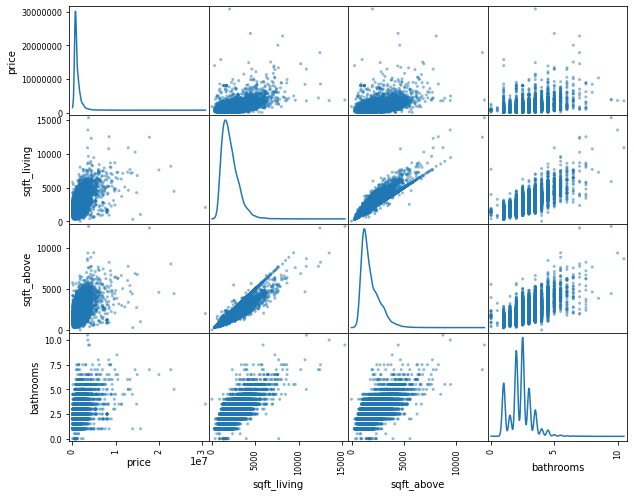

In [6]:
#fig, ax = plt.subplots(figsize=(15,10))
pd.plotting.scatter_matrix(df[['price', 'sqft_living', 'sqft_above', 'bathrooms']], diagonal='kde', figsize=(10,8));

`sqft_living`, `bathrooms`, `sqft_above`, all seem promising.  Need to inquire about `waterfront`, `greenbelt`, and `nuisance` in terms of might be good indicators (and what the addiction treatment center might be interested in) as well as `heat_source`, and `sewer_system` for compliance reasons for sober homes.  Lastly, need to look further into either `adddress` or `lat`+`long` to see if can determine zones (homes in dense residential areas tend to have push back from the community if a company tires to install halfway home or sober living home in their neighborhoods). 

In [7]:
df['waterfront'].value_counts()

NO     29600
YES      511
Name: waterfront, dtype: int64

In [8]:
df['greenbelt'].value_counts()

NO     29339
YES      772
Name: greenbelt, dtype: int64

In [9]:
df['nuisance'].value_counts()

NO     24862
YES     5249
Name: nuisance, dtype: int64

In [10]:
df['view'].value_counts()

NONE         26555
AVERAGE       1910
GOOD           877
EXCELLENT      549
FAIR           220
Name: view, dtype: int64

In [11]:
df['condition'].value_counts()

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64

In [12]:
df['grade'].value_counts()

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [13]:
df['heat_source'].value_counts()

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [14]:
df['sewer_system'].value_counts()

PUBLIC                25767
PRIVATE                4336
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [15]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [16]:
df[['lat', 'long']]

,lat,long
0,47.461975,-122.19052
1,47.711525,-122.35591
2,47.502045,-122.22520
3,47.566110,-122.29020
4,47.532470,-122.07188
...,...,...
30150,47.664740,-122.32940
30151,47.565610,-122.38851
30152,47.610395,-122.29585
30153,47.449490,-122.18908


### Notes
Based on this very basic exploration of the data, the first stab at a complex linear regression might include `sqft_living`, `bathrooms`, `waterfront`, `greenbelt`, `nuisance`, `view` , `condition`, `grade`, and the manufactured `zone`. (I'm guessing that not all of the categorical values currently in this list will make it to the final regression model, but I do want to see what perhaps is relevant or not...)

The first model created will be a simple linear regression most likely with the independent variable of `sqft_living`.  

Now that I've narrowed down some ideas about which variables to include, I need to do some further EDA -- specifically concerning the distributions of these variables -- and then start model iterations.  (Also need to manufacture the zone variable, but need internet to do so...)

# Geographing the data

In [17]:
#pip install geopandas

In [18]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [19]:
df_lat_long = df[['price','lat', 'long']]

In [20]:
# import Kings County Map
KC_map = gpd.read_file('data/map_data/map.shp')

In [21]:
# zip lat and long 
lat_long = [Point(xy) for xy in zip(df_lat_long['long'], df_lat_long['lat'])]

# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(df_lat_long, crs='EPSG:4326', geometry=lat_long)

In [22]:
geo_df.head()

,price,lat,long,geometry
0,675000.0,47.461975,-122.19052,POINT (-122.19052 47.46198)
1,920000.0,47.711525,-122.35591,POINT (-122.35591 47.71153)
2,311000.0,47.502045,-122.22520,POINT (-122.22520 47.50205)
3,775000.0,47.566110,-122.29020,POINT (-122.29020 47.56611)
4,592500.0,47.532470,-122.07188,POINT (-122.07188 47.53247)


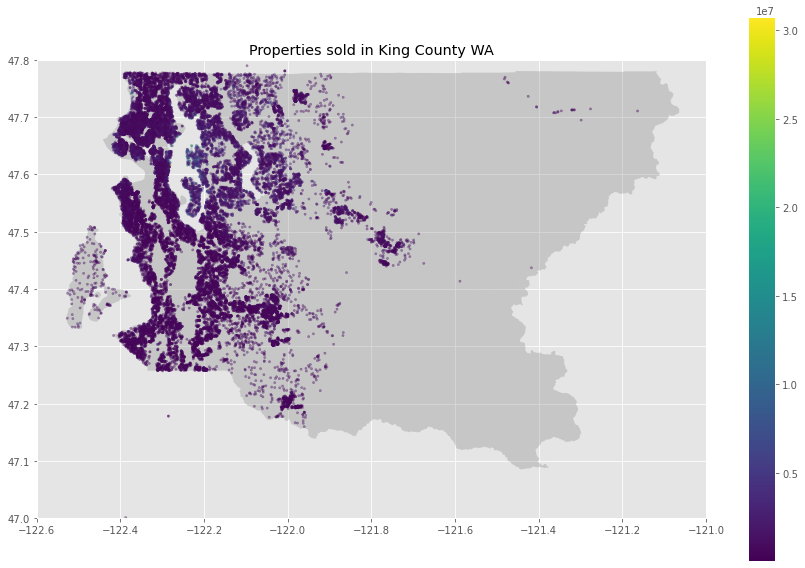

In [23]:
fig, ax = plt.subplots(figsize=(15,10))

# plot lat and long
KC_map.plot(ax=ax, color='grey', alpha=.3)
geo_df.plot(column='price', ax=ax, alpha=.4, legend=True, markersize=5)

# set lat and long boundaries for map display (?)
plt.xlim(-122.6, -121.0)
plt.ylim(47.0, 47.8)

ax.set_title('Properties sold in King County WA');

# EDA

## Let's check the address information

In [24]:
df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [25]:
df['city'] = df['address'].map(lambda x: x.split(',')[1].strip())
df['city'].value_counts().head(10)

Seattle         9363
Renton          1943
Kent            1583
Bellevue        1528
Auburn          1511
Kirkland        1270
Federal Way     1167
Redmond          985
Sammamish        976
Maple Valley     887
Name: city, dtype: int64

In [26]:
df['state'] = df['address'].map(lambda x: x.split(',')[2].strip()[:10])
df['state'].value_counts()

Washington    29200
Nebraska 6      158
New Jersey       76
New York 1       66
Minnesota        63
              ...  
Oregon 970        1
Iowa 52241        1
Nevada 891        1
Iowa 50161        1
Ohio 45039        1
Name: state, Length: 82, dtype: int64

Apparently, not all of the houses in this list are in Kings County Washington (or not even in Washington State at all!).  I'll delete any entries that are not in Washington State and from there go back to the counties list to see if I have a more managable list to then pull zoneing information for.

In [27]:
df = df[df['state'] == 'Washington']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29200 entries, 0 to 30154
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29200 non-null  int64  
 1   date           29200 non-null  object 
 2   price          29200 non-null  float64
 3   bedrooms       29200 non-null  int64  
 4   bathrooms      29200 non-null  float64
 5   sqft_living    29200 non-null  int64  
 6   sqft_lot       29200 non-null  int64  
 7   floors         29200 non-null  float64
 8   waterfront     29200 non-null  object 
 9   greenbelt      29200 non-null  object 
 10  nuisance       29200 non-null  object 
 11  view           29200 non-null  object 
 12  condition      29200 non-null  object 
 13  grade          29200 non-null  object 
 14  heat_source    29200 non-null  object 
 15  sewer_system   29200 non-null  object 
 16  sqft_above     29200 non-null  int64  
 17  sqft_basement  29200 non-null  int64  
 18  sqft_g

In [28]:
# https://en.wikipedia.org/wiki/Category:Cities_in_King_County,_Washington
# https://kingcounty.gov/en/legacy/depts/health/codes/cities.aspx

cities_towns = pd.read_excel('data/KC_cities_towns.xlsx')
cities_towns.head()

,Name
0,Algona
1,Ames Lake
2,Auburn
3,Baring
4,Barneston


In [29]:
df['city'].isin(cities_towns['Name']).value_counts()

True     29158
False       42
Name: city, dtype: int64

In [30]:
df['city_in_county'] = df['city'].isin(cities_towns['Name'])

In [31]:
df = df[df['city_in_county'] == True]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29158 entries, 0 to 30154
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29158 non-null  int64  
 1   date            29158 non-null  object 
 2   price           29158 non-null  float64
 3   bedrooms        29158 non-null  int64  
 4   bathrooms       29158 non-null  float64
 5   sqft_living     29158 non-null  int64  
 6   sqft_lot        29158 non-null  int64  
 7   floors          29158 non-null  float64
 8   waterfront      29158 non-null  object 
 9   greenbelt       29158 non-null  object 
 10  nuisance        29158 non-null  object 
 11  view            29158 non-null  object 
 12  condition       29158 non-null  object 
 13  grade           29158 non-null  object 
 14  heat_source     29158 non-null  object 
 15  sewer_system    29158 non-null  object 
 16  sqft_above      29158 non-null  int64  
 17  sqft_basement   29158 non-null 

## EDA

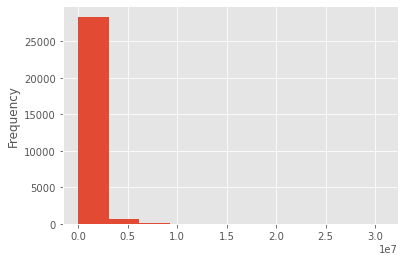

In [33]:
df['price'].plot.hist();

Not super normal -- looks like right skewed due to some outlier very expensive homes sold.  Depending on model results, might apply a log transformation, or drop outliers.

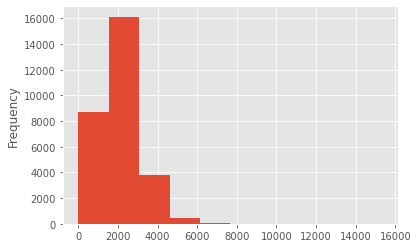

In [34]:
df['sqft_living'].plot.hist();

More normal looking than the price distribution, but not a completely normal distribution either.  Again we see a right skew which might be changed with either a log transformation or a dropping of outliers. Will need to dig further and circle back to.

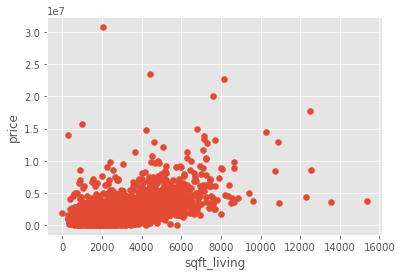

In [35]:
fig, ax = plt.subplots()
plt.scatter(df['sqft_living'], df['price'])
ax.set_xlabel('sqft_living')
ax.set_ylabel('price');

Not a super linear relationship, but we will give it a go anyhow.

## Model Iteration

In [36]:
X_simple = df[['sqft_living']]
y = df['price']

In [37]:
import statsmodels.api as sm
model_simple = sm.OLS(y, sm.add_constant(X_simple))
results_simple = model_simple.fit()
print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                 1.790e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:16:43   Log-Likelihood:            -4.3401e+05
No. Observations:               29158   AIC:                         8.680e+05
Df Residuals:                   29156   BIC:                         8.680e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.267e+04   9908.860     -9.352      

The r-squared statistic is showing that this simple linear regression is explaining about 37% of the variance in sale price.  The model, intercept beta, and the coefficient for our variable `sqft_living` are all statistically significant. The model is predicting that a house with zero square feet living area would sell for negative 75.6k, and for each one squre foot increase in living area, a house would become 560 more expensive. 

In [38]:
from sklearn.metrics import mean_absolute_error
y_simple_pred = results_simple.predict(sm.add_constant(X_simple))
mean_absolute_error(y, y_simple_pred)

398570.63572842296

For any point in our model, it could be off by +/- ~$400,000.

## Put a line of best fit graph
## put a residuals graph

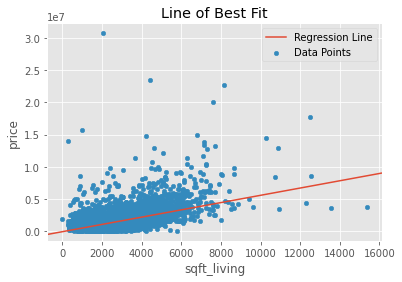

In [39]:
fig, ax = plt.subplots()
df.plot.scatter(x='sqft_living', y='price', label='Data Points', ax=ax)
sm.graphics.abline_plot(model_results=results_simple, label="Regression Line", ax=ax)
plt.title("Line of Best Fit")
ax.legend();

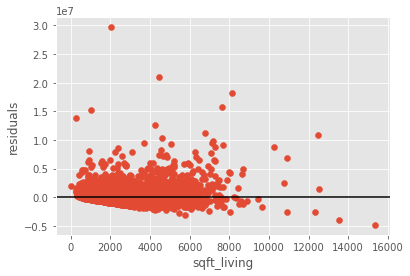

In [40]:
fig, ax = plt.subplots()
ax.scatter(df['sqft_living'], results_simple.resid)
ax.axhline(y=0, color='black')
ax.set_xlabel('sqft_living')
ax.set_ylabel('residuals');

### Note here about omnibus and JB -- have to reject null that the assumptions of linear regression are being met...

Not a fabulous model. Let's see if we can improve it.

# Adding more variables - preprocessing the categorical variables

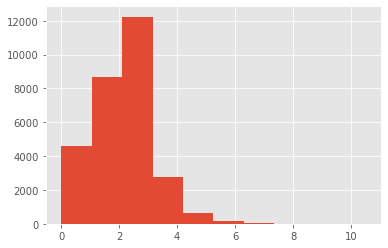

In [41]:
df['bathrooms'].hist();

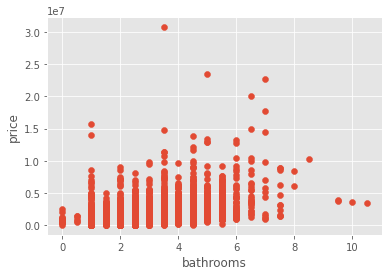

In [42]:
fig, ax = plt.subplots()
plt.scatter(df['bathrooms'], df['price'])
ax.set_xlabel('bathrooms')
ax.set_ylabel('price');

So that doesn't look linear at all :(.  The distribution of bathrooms was fairly normal, again with a bit of right skew.  From the scatter plot we can see that therre are some outliers both in the number of bathrooms total (10 bathrooms is a lot!) as well as in sale price (note the home with about 3.5 bath that sold for over $3 million).

## Categorical Variables

In [43]:
4%2

0

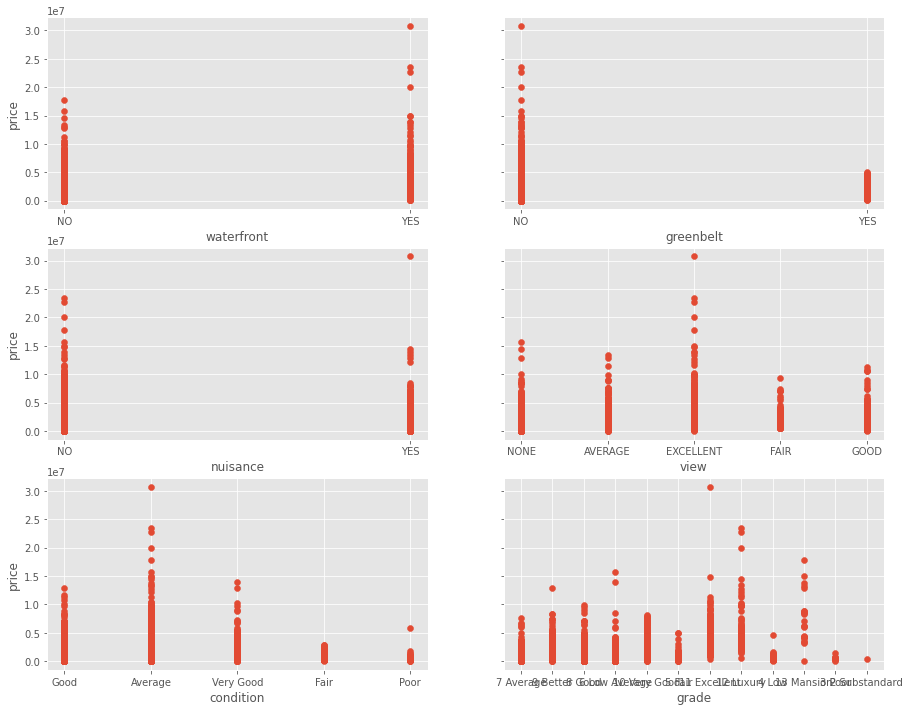

In [44]:
cat_vars = ['waterfront', 'greenbelt', 'nuisance', 'view', 'condition', 'grade']

fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15,12), sharey=True)

for i,cat in enumerate(cat_vars):
    # set proper axis
    row = i // 2
    col = i % 2
    ax = axes[row][col]
    
    #set x and y
    x = df[cat]
    y_graph = df['price']
    
    ax.scatter(x, y_graph)
    ax.set_xlabel(cat)
    if col == 0:
        ax.set_ylabel('price')

From looking at the above graphs it appears that greenbelt, view, condition and grade might be beneficial to include in the model. As for waterfront, there appears to not be much variation between houses that are or are not on a waterfront.

Also note here that don't want multicolinearity thus pick/choose (for both numerical and categorical data -- maybe more just for numberical, and need to mention earlier?)

Furthermore, based on the distributions for condition, grade and view, it would be good to create a 'low end' and 'high end' groupped tier for these variables due to low quantities in each of the ends of the sub categories.

In [45]:
df['view'].value_counts()

NONE         25640
AVERAGE       1890
GOOD           868
EXCELLENT      545
FAIR           215
Name: view, dtype: int64

In [46]:
cat_vars = df[['waterfront', 'greenbelt', 'nuisance', 'view', 'grade']]

In [47]:
df['grade'].value_counts()

7 Average        11545
8 Good            8847
9 Better          3583
6 Low Average     2847
10 Very Good      1347
11 Excellent       402
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [48]:
# Combine Poor, Substandard and Low all into new category Lower
import numpy as np
mask = (df['grade'] == '3 Poor') | (df['grade'] == '2 Substandard') | (df['grade'] == '4 Low')
df['grade_2_3_4 Lower'] = np.where(mask, 1, 0)
df['grade_2_3_4 Lower'].value_counts()

0    29102
1       56
Name: grade_2_3_4 Lower, dtype: int64

In [49]:
pd.get_dummies(df[['grade']])

,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30150,0,0,0,0,0,0,0,0,0,0,1,0
30151,0,0,0,0,0,0,0,0,0,1,0,0
30152,0,0,0,0,0,0,0,0,0,1,0,0
30153,0,0,0,0,0,0,0,0,0,0,1,0


In [50]:
cat_vars_dummied = pd.get_dummies(cat_vars)
df_a = cat_vars_dummied.drop(['waterfront_NO', 'view_NONE', 'greenbelt_NO', 'nuisance_NO', 'grade_7 Average', 
                             'grade_3 Poor', 'grade_2 Substandard', 'grade_4 Low'], axis=1)
df_dummied = pd.concat([df, df_a], axis=1)
df_dummied

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,view_FAIR,view_GOOD,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,0,0,0,0,0,0,0,0,0,1
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,0,0,0,0,0,0,0,0,1,0
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,1,0,0,0,0,0,0,0,0,0
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,0,0,0,0,0,0,0,0,0,0
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,0,0,0,0,0,0,0,0,1,0


In [51]:
subset_df = df_dummied[['price', 'sqft_living', 'bathrooms', 'waterfront_YES', 'greenbelt_YES', 'nuisance_YES', 
                       'view_AVERAGE', 'view_GOOD', 'view_EXCELLENT', 'view_FAIR', 'grade_10 Very Good', 
                        'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion', 'grade_2_3_4 Lower', 
                        'grade_5 Fair', 'grade_6 Low Average', 'grade_8 Good', 'grade_9 Better']]
subset_df

,price,sqft_living,bathrooms,waterfront_YES,greenbelt_YES,nuisance_YES,view_AVERAGE,view_GOOD,view_EXCELLENT,view_FAIR,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2_3_4 Lower,grade_5 Fair,grade_6 Low Average,grade_8 Good,grade_9 Better
0,675000.0,1180,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,920000.0,2770,2.5,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,311000.0,2880,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,775000.0,2160,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
4,592500.0,1120,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,1910,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30151,1313000.0,2020,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
30152,800000.0,1620,2.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
30153,775000.0,2570,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [52]:
X_multi = subset_df.drop('price', axis=1)
y = subset_df['price']
model_multi = sm.OLS(y, sm.add_constant(X_multi))
results_multi = model_multi.fit()
print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1722.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:16:51   Log-Likelihood:            -4.3043e+05
No. Observations:               29158   AIC:                         8.609e+05
Df Residuals:                   29139   BIC:                         8.610e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.464e+05   1

This model is doing better than our baseline model.  The R-squared score has improved to .437; our model explains about 44% of the variance in price (with our outlook of inferential statistics this is not super great...).  The model as a whole as well as all of our coefficients (constant included) are statistically significant.   We are still running into the same issue that our model is not meeting the assumptions of linear regression (as seen from the statistically significant Jarque-Bera and Omnibus results).  I think the next steps include looking further into the assumptions (the residuals), and applying some transformations (such as a log transformation to the sqft_living variable) to try and improve the model prior to deciding on the final model and analyzing

- Need to look at notes + data, can I apply transformations to categorical data?
- ALSO, need to remember how to parse out the data based on third variable (look at notes, was this just for graphing or did this apply to the model somehow?  I feel like it did but can't remember how...)
- ALSO ALSO, want to graph some of this out, need to look at it -- how do I graph line of best fit again?

In [53]:
y_multi_pred = results_multi.predict(sm.add_constant(X_multi))
mean_absolute_error(y, y_multi_pred)

354305.7795573716

Again, for any point in our model, the prediction can be off by about +/- $400,000

## Graphs

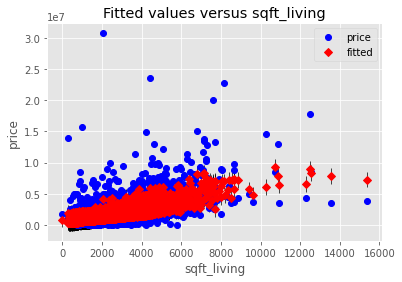

In [54]:
sm.graphics.plot_fit(results_multi, 'sqft_living');

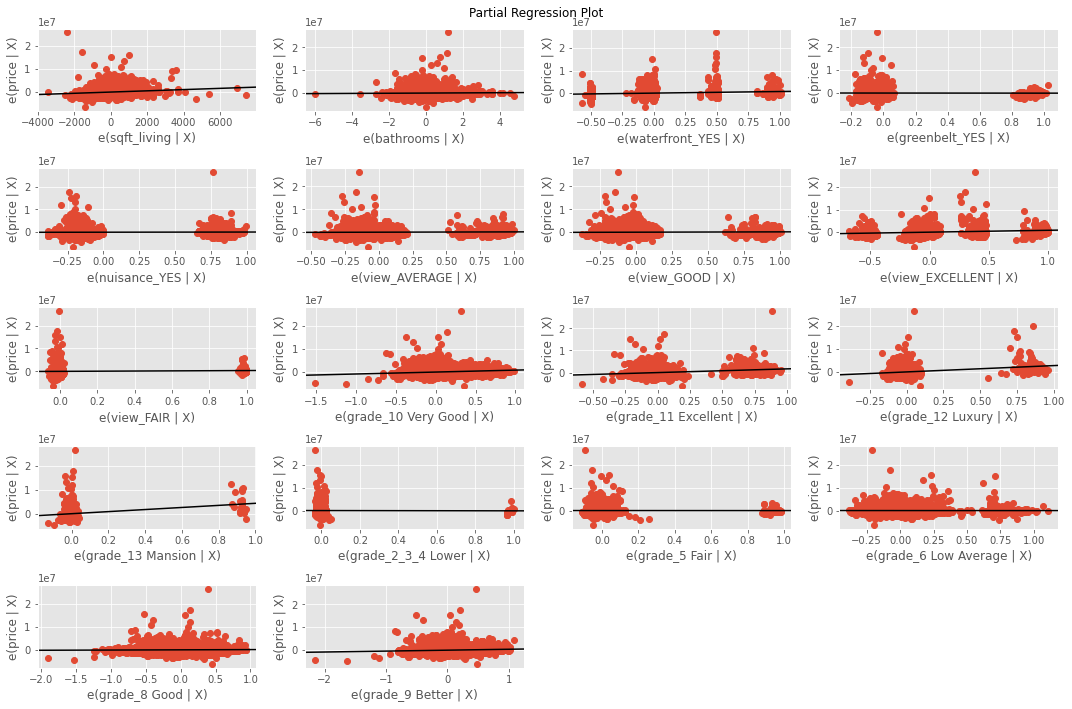

In [55]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results_multi, exog_idx=list(X_multi.columns.values),
                                 grid=(5,4), fig=fig)
plt.show()

In [56]:
# MAE and graphs should be the same because didn't actually change data, just centered it to see 'average' home in constant.

## Drop Outliers

In [57]:
subset_df['price'].sort_values(ascending=False).head(15)

23470    30750000.0
3760     23500000.0
25561    22750000.0
27175    20000000.0
18100    17800000.0
9516     15740000.0
10605    15000001.0
8054     14850000.0
22707    14500000.0
5811     13950000.0
12817    13850000.0
8656     13425000.0
6106     13300000.0
16673    12932174.0
6936     12901148.0
Name: price, dtype: float64

In [58]:
# create dataframe with price outliers dropped
subset_df_1 = subset_df[subset_df['price'] < 20000000]

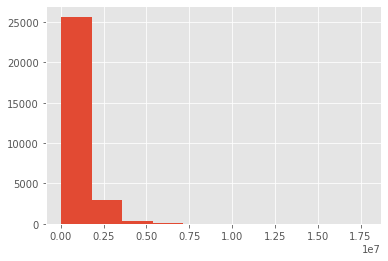

In [59]:
subset_df_1['price'].hist();

Still really skewed right...

In [60]:
subset_df_1['price'].sort_values(ascending=False)

18100    17800000.0
9516     15740000.0
10605    15000001.0
8054     14850000.0
22707    14500000.0
            ...    
27028       28854.0
20406       28559.0
7577        28307.0
21793       27563.0
8557        27360.0
Name: price, Length: 29154, dtype: float64

In [61]:
y_1 = subset_df_1['price']
X_1 = subset_df_1.drop('price', axis=1)
model_1 = sm.OLS(y_1, sm.add_constant(X_1))
results_1 = model_1.fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1856.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:17:08   Log-Likelihood:            -4.2835e+05
No. Observations:               29154   AIC:                         8.567e+05
Df Residuals:                   29135   BIC:                         8.569e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.497e+05   1

In [62]:
y_1_pred = results_1.predict(sm.add_constant(X_1))
mean_absolute_error(y_1, y_1_pred)

350106.01450272533

So, while our r-squared stat went down (sad face), the mean absolute error went down a small bit as well (good thing).  But it is rather marginal indeed.  When rounding I would still most likely say that for any point in our model, the prediction can be off by about +/- $400,000...

In [63]:
X_1['bathrooms'].mean()

2.3323043150168075

## Multi with Standard Scale

In [64]:
X_1_stand = X_1.copy()
for col in ['sqft_living', 'bathrooms']:
    X_1_stand[col] = (X_1_stand[col] - X_1_stand[col].mean()) / X_1_stand[col].std()

In [65]:
model_1_stand = sm.OLS(y_1, sm.add_constant(X_1_stand))
results_1_stand = model_1_stand.fit()
print(results_1_stand.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1856.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:17:08   Log-Likelihood:            -4.2835e+05
No. Observations:               29154   AIC:                         8.567e+05
Df Residuals:                   29135   BIC:                         8.569e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                9.069e+05   6

## Graph partial resid plot here?

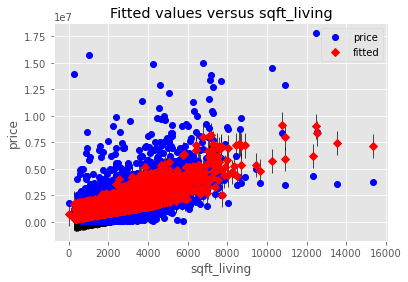

In [66]:
sm.graphics.plot_fit(results_1, 'sqft_living');

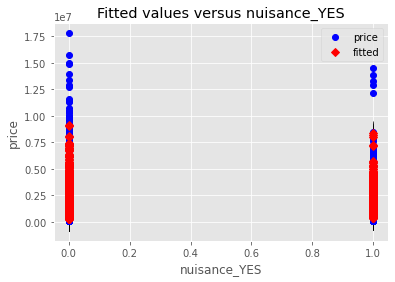

In [67]:
sm.graphics.plot_fit(results_1, 'nuisance_YES');

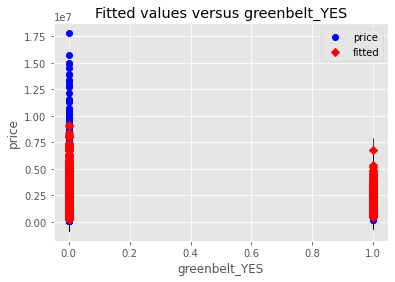

In [68]:
sm.graphics.plot_fit(results_1, 'greenbelt_YES');

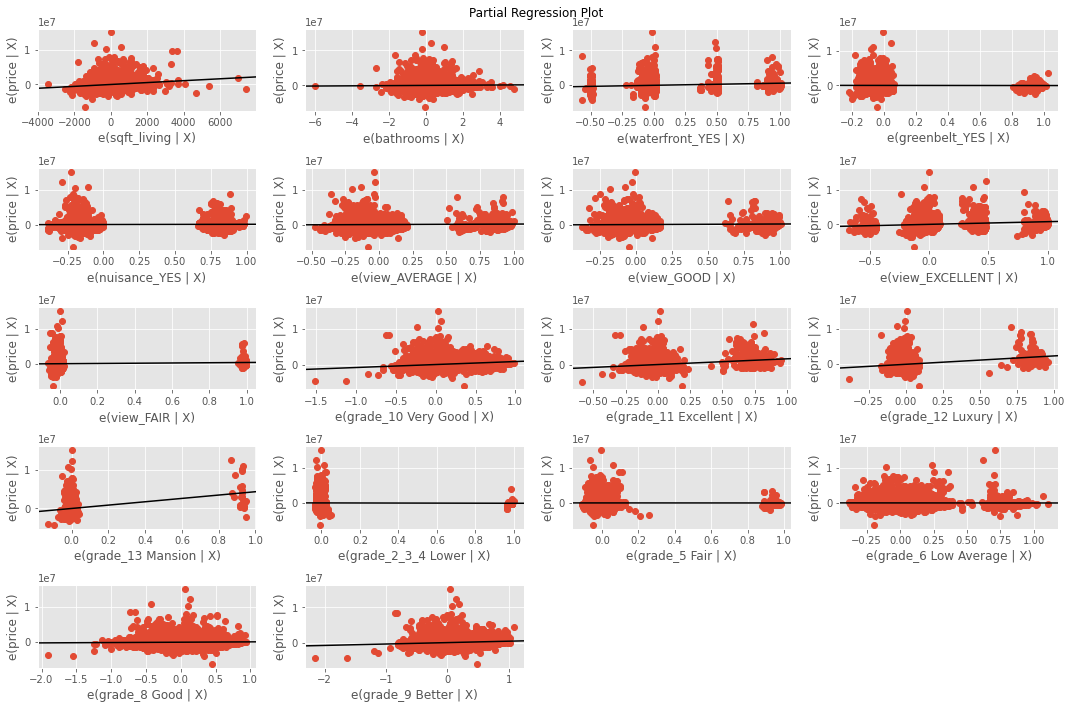

In [69]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results_1, exog_idx=list(X_1.columns.values),
                                 grid=(5,4), fig=fig)
plt.show()

## Log Transformation

In [70]:
import numpy as np
subset_df_2 = subset_df_1.copy()
subset_df_2['price_log'] = subset_df_2['price'].apply(lambda x: np.log(x))
y_log = subset_df_2['price_log']

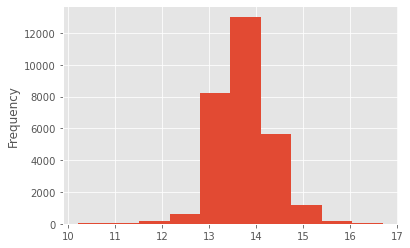

In [71]:
y_log.plot.hist();

In [72]:
subset_df_2['sqft_living_log'] = subset_df_2['sqft_living'].apply(lambda x: np.log(x))
X_2 = subset_df_2.drop(['price', 'price_log', 'sqft_living'], axis=1)

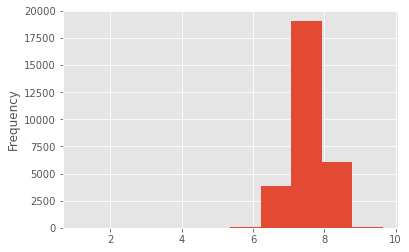

In [73]:
X_2['sqft_living_log'].plot.hist();

In [74]:
len(X_2[X_2['sqft_living_log'] <6])

25

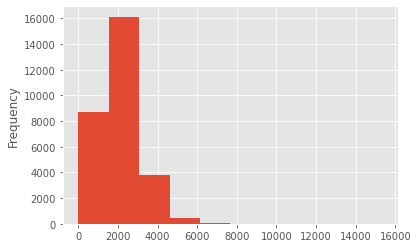

In [75]:
subset_df_2['sqft_living'].plot.hist();

In [76]:
model_y_log = sm.OLS(y_log, sm.add_constant(X_2))
results_y_log = model_y_log.fit()
print(results_y_log.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     1393.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:17:34   Log-Likelihood:                -16641.
No. Observations:               29154   AIC:                         3.332e+04
Df Residuals:                   29135   BIC:                         3.348e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.8505    

Based on the model iteration above, I am going to go with the multiple variable model where the outliers in price have been dropped.  The log transformation did not appear to address the issues with the assumptions with linear regression that we can see from teh statistically significant Omnibus and Jarque-Bera results.  As it did not imporve the model in any tangible way and is harder to interpret, I will be using the results from this second to last model.

Will run a model where numerical values are standardized on this chosen model to see 'average home cost' based on the constant coefficient.  Then interpret rest of statisitcally significant results from original model.  

Lastly, in the final model, I am going to drop the greenbelt variable.  With the drop of the outliers, and the presense of the other categorical variables (notably the grade variable), this variable is not statistically significant -- if the R-squared goes down without it then maybe put back in... if goes up leave out...

# Final Model

In [85]:
y_final = subset_df_1['price']
X_final = subset_df_1.drop(['price', 'greenbelt_YES'], axis=1)
model_final = sm.OLS(y_final, sm.add_constant(X_final))
results_final = model_final.fit()
print(results_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     1965.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:27:30   Log-Likelihood:            -4.2835e+05
No. Observations:               29154   AIC:                         8.567e+05
Df Residuals:                   29136   BIC:                         8.569e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.496e+05   1

In [86]:
y_final_pred = results_final.predict(sm.add_constant(X_final))
mean_absolute_error(y_final, y_final_pred)

350026.1389116836

In [87]:
model_1_stand = sm.OLS(y_1, sm.add_constant(X_1_stand.drop('greenbelt_YES', axis=1)))
results_1_stand = model_1_stand.fit()
results_1_stand.params[0]

906097.8001891614

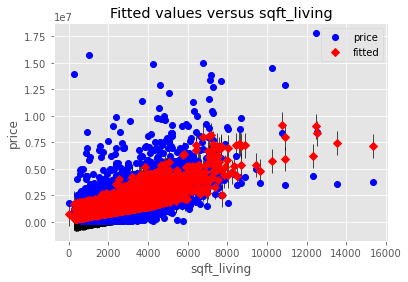

In [88]:
sm.graphics.plot_fit(results_final, 'sqft_living');

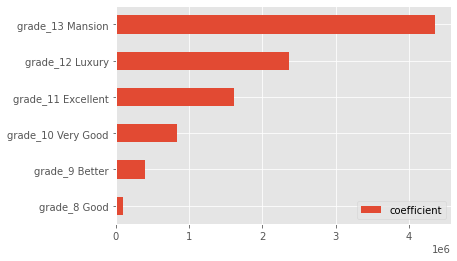

In [117]:
grades = ['grade_8 Good', 'grade_9 Better', 'grade_10 Very Good', 
          'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion']
results_df = pd.DataFrame(results_final.params, columns=['coefficient'])
results_df.loc[grades].plot.barh();

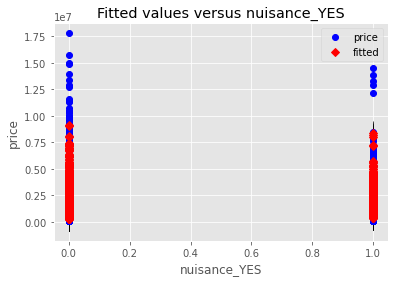

In [92]:
sm.graphics.plot_fit(results_final, 'nuisance_YES');

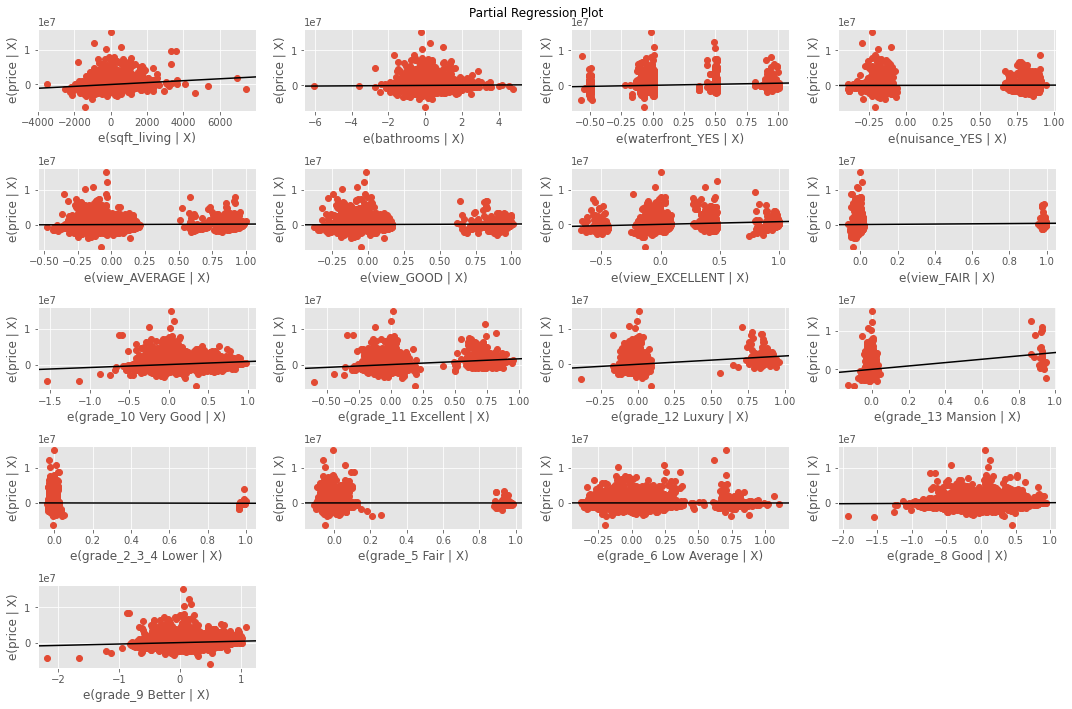

In [89]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(results_final, exog_idx=list(X_final.columns.values),
                                 grid=(5,4), fig=fig)
plt.show()

##  Investigation into Assumptions of Final Model (?)

# Analysis + Conclusions

Overall:
- The model is overall statistically significant, and explains about 53.4% of the variance in price.
- The final model includes the following variables: `sqft_living`, `bathrooms`, `waterfront`, `nuisance`, `view`, and `grade`
- The constant coefficient, and the coefficients for the two numerical variables are all statistically significant
- Most, but not all, of the categorical variables are statistically significant.

In specific:
- An average house (a house with a living area of about 2131sqft, about 2.3 bathrooms, is not on a waterfront, does not have any recorded nuisances, does not have any view, and has an overall grade of average), will cost about \$906k
- For every one square foot increase in living area, house price increases by about \$276
- For every one more bathroom in the house, the price increases by about \$29k
- If the house is on a waterfront, then it will be about \$602k more expensive than if it was not on a waterfront
- If the house has a recorded nuisance next to it, the model predicts and increase in house price by about \$70k.
- Breaking down VIEW -- compared to having NO view:
   - if house has a Fair view, increases value by about \$356k
   - if house has an Average view, increases value by about \$137k
   - if house has a Good view, increases value by about \$159k 
   - if house has an Excellent view, increases value by about \$767k

- Breaking down GRADE, compared to an Average grade:
   - if grade is Good, increases value by about \$95k
   - if grade is Better, increases value by about \$400k
   - if grade is Very Good, increases value by about \$842k
   - if grade is Excellent, increases value by about \$1.6m
   - if grade is Luxury, increasees value by about \$2.4m
   - if grade is Mansion, increases value by about \$4.4m

The Mean Absolute Error shows that for any given prediction from the model, it can be off by about +/- \$350k

## Suggestions
1. Plan to budget at least \$900,000 per house plan to purchase. 
2. For purposes of creating sober living homes, it would be beneficial to purchase a home with an overall grade between average and very good.  For homes in this range it would be advisable to budget an extra \$800,000 if possible.  If a home with an average or lower grade is purchased, and this extra budgeted money is not needed, then this money could be used for and renovations needed rather than the initial home purchase.

# Next Steps

It would be beneficial to add information concerning the zones these houses are in.  However, due to the complexity of how zones are distinguished (cities and towns decide these areas rather than the county, and they are not mapped along easily distiguishable data such as zip code), it would be more helpful to incorperate this data once a single or a few specific towns/cities have been targeted.  This information would be beneficial as the residential areas tend to give pushback on companies and people who turn their homes into half-way houses or sober living homes which could be detrimental to patient success in reincorperating into society.


![Zip_Code_Map](/